# Propiedades de imagen raster

In [16]:
import rasterio
import numpy as np
from rasterio.plot import show, adjust_band
from shapely.geometry import Polygon
from rasterio.mask import mask

Carga de imagen raster usando rasterio

In [17]:
imgpath = "Mosaicos/bosqueed.tif"
dataset = rasterio.open(imgpath)
dataset.crs

CRS.from_epsg(32717)

Característica de imagen raster

In [18]:
print("Bounds: ",dataset.bounds)
print("Transform: ",dataset.transform)
print("Indexes: ",dataset.indexes)

Bounds:  BoundingBox(left=615357.7497404777, bottom=9762996.70609582, right=615527.3583145756, top=9763155.536489662)
Transform:  | 0.05, 0.00, 615357.75|
| 0.00,-0.05, 9763155.54|
| 0.00, 0.00, 1.00|
Indexes:  (1, 2, 3, 4)


In [19]:
x, y = dataset.xy(500,500)
print("Original: ",x,y)
x, y = dataset.transform * (500, 500)
print("Transform: ",x,y)
row, column = dataset.index(x, y)
print("Indices: ",row,column)

Original:  615382.7686297604 9763130.514578389
Transform:  615382.7436358649 9763130.539575303
Indices:  500 500


Obtener parte de la imagen **edgelen** es el factor de visualizacion

In [20]:
x, y, edgelen = 615382, 9763130, 100  # based on EPSG:32631
roi = Polygon([(x - int(edgelen / 2), y + int(edgelen / 2)),
               (x + int(edgelen / 2), y + int(edgelen / 2)),
               (x + int(edgelen / 2), y - int(edgelen / 2)),
               (x - int(edgelen / 2), y - int(edgelen / 2))])
print(roi)

POLYGON ((615332 9763180, 615432 9763180, 615432 9763080, 615332 9763080, 615332 9763180))


(4, 1511, 1486)


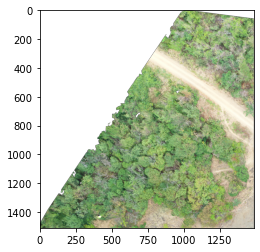

<AxesSubplot:>

In [21]:
crop_img, crop_transform = mask(dataset, shapes=[roi], crop=True)
crop_img = adjust_band(crop_img)
print(crop_img.shape)
show(crop_img)